## FIFA 19

The objective is to find the players that have a high value but currently underpaid. 

### General setup.
___

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, show
from bokeh.models import HoverTool

%matplotlib inline

In [2]:
# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

<br>

### Loading the data set. 
___

The data set contains detailed attributes for every player registered in the latest edition of FIFA 19 database. $^1$

In [3]:
# Load the data set.
df = pd.read_csv('fifa_data.csv')
df.set_index(df.columns[0], inplace=True)
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
df.shape

(18207, 88)

In [5]:
df.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


<br>

### Cleaning the data.
___

Separating the data set to find the underpaid players (with high value and the low salary). 

In [6]:
# Find the best players but with the lower salary.
value_vs_wage = pd.DataFrame(df, columns = ['Name', 'Value', 'Wage'])
value_vs_wage

,Name,Value,Wage
Unnamed: 0,,,
0,L. Messi,€110.5M,€565K
1,Cristiano Ronaldo,€77M,€405K
2,Neymar Jr,€118.5M,€290K
3,De Gea,€72M,€260K
4,K. De Bruyne,€102M,€355K
...,...,...,...
18202,J. Lundstram,€60K,€1K
18203,N. Christoffersson,€60K,€1K
18204,B. Worman,€60K,€1K


In [7]:
# Convert the player value into integers.
value_vs_wage.Value = value_vs_wage.Value.replace({'€': '', 'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval)

In [8]:
# Convert the wages into integers.
value_vs_wage.Wage = value_vs_wage.Wage.replace({'€': '', 'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval)

In [9]:
# Create a new column Difference between Value and Wages
value_vs_wage['Difference'] = value_vs_wage.Value - value_vs_wage.Wage

# Sort by difference and find the biggest gap
value_vs_wage.sort_values('Difference', ascending=False)

,Name,Value,Wage,Difference
Unnamed: 0,,,,
2,Neymar Jr,118500000.0,290000.0,118210000.0
0,L. Messi,110500000.0,565000.0,109935000.0
4,K. De Bruyne,102000000.0,355000.0,101645000.0
5,E. Hazard,93000000.0,340000.0,92660000.0
15,P. Dybala,89000000.0,205000.0,88795000.0
...,...,...,...,...
17752,S. Phillips,0.0,1000.0,-1000.0
12192,H. Sulaimani,0.0,3000.0,-3000.0
3550,S. Nakamura,0.0,4000.0,-4000.0


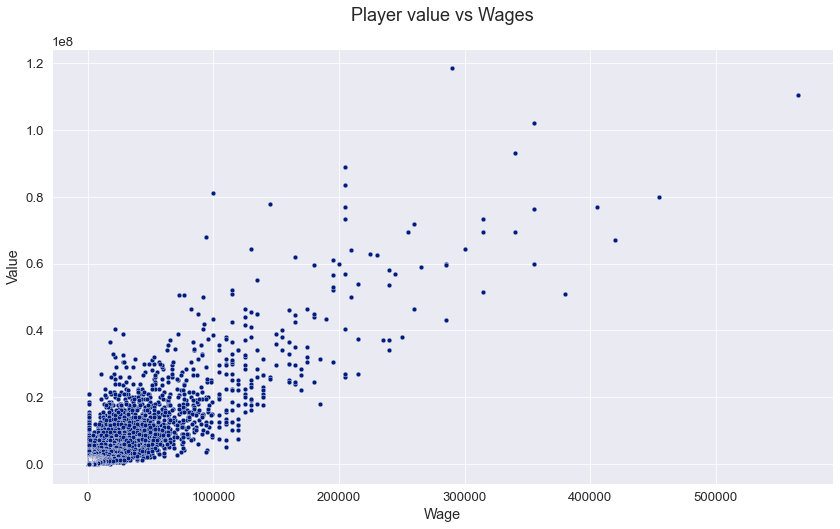

In [10]:
# Style the plot.
sns.set(palette="dark", style="darkgrid", context="paper", font_scale=1.5)

# Plot the data.
graph = sns.scatterplot(data=value_vs_wage, x='Wage', y='Value')
graph.axes.set_title('Player value vs Wages', fontsize=18, y=1.05)
plt.show()

In [11]:
# Add a hover
tooltips = HoverTool(tooltips = [
    ('index', '$index'),
    ('(Wage, Value)', '(@Wage, @Value)'),
    ('Name', '@Name')
])

# Plot the data
p = figure(title='Player value vs Wages', x_axis_label='Wage', y_axis_label='Value', plot_width=700, plot_height=700, tools=[tooltips])
p.circle('Wage', 'Value', size=10, source=value_vs_wage)
show(p)

In [12]:
# Select the players with value above 0.7 whose wages are lower than 300,000.
# Sort by by the highest value.
value_vs_wage[value_vs_wage.Value.gt(0.7*1e8) & value_vs_wage.Wage.le(300000)].sort_values('Value', ascending=False)

,Name,Value,Wage,Difference
Unnamed: 0,,,,
2,Neymar Jr,118500000.0,290000.0,118210000.0
15,P. Dybala,89000000.0,205000.0,88795000.0
16,H. Kane,83500000.0,205000.0,83295000.0
25,K. Mbappé,81000000.0,100000.0,80900000.0
17,A. Griezmann,78000000.0,145000.0,77855000.0
10,R. Lewandowski,77000000.0,205000.0,76795000.0
31,C. Eriksen,73500000.0,205000.0,73295000.0
3,De Gea,72000000.0,260000.0,71740000.0


<br>
    
### References.
___

1. [FIFA 19 complete player dataset](https://www.kaggle.com/karangadiya/fifa19)
2. [Bokeh Hovering](https://docs.bokeh.org/en/latest/docs/user_guide/tools.html?highlight=hover)

<br>

### End.
___